In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

## Anonymized_Patient_Parameters_Atherosclerosis

In [ ]:
file_path = r'..\Anonymized_Patient_Parameters_Atherosclerosis.csv'

In [3]:
def preprocess_data(file_path):
    df = pd.read_csv(file_path, encoding='ascii')
    df.columns = ['No', 'Age', 'Gender', 'Height', 'Weight', 'Physical Activity']
    df = df[1:]  
    df.reset_index(drop=True, inplace=True)
    # Converting relevant columns to numeric types
    df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
    df['Height'] = pd.to_numeric(df['Height'], errors='coerce')
    df['Weight'] = pd.to_numeric(df['Weight'], errors='coerce')
    df['Physical Activity'] = pd.to_numeric(df['Physical Activity'], errors='coerce')
    return df

df_patient_params = preprocess_data(file_path)

In [4]:
# Displaying the cleaned dataframe head to verify changes
print(df_patient_params.head())
# Display basic information about the dataset
print("\nDataset Info:")
print(df_patient_params.info())

print("\nFirst few rows of the dataset:")
print(df_patient_params.head())

print("\nMissing values in each column:")
print(df_patient_params.isnull().sum())

# Basic statistical description
print("\nStatistical description of numerical columns:")
print(df_patient_params.describe())

         No  Age Gender  Height  Weight  Physical Activity
0  case,320   64      M     172      97                1.0
1  case,321   61      M     174     102                1.0
2  case,322   57      F     158      82                1.0
3  case,323   34      M     168      92                1.0
4  case,324   35      M     176      88                2.0

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   No                 155 non-null    object 
 1   Age                155 non-null    int64  
 2   Gender             155 non-null    object 
 3   Height             155 non-null    int64  
 4   Weight             155 non-null    int64  
 5   Physical Activity  155 non-null    float64
dtypes: float64(1), int64(3), object(2)
memory usage: 7.4+ KB
None

First few rows of the dataset:
         No  Age Gender  Height  Weight  Phy

### Feature Engineering

In [5]:
## (Masse Corporelle => poids / la taille)
df_patient_params['Height_m'] = df_patient_params['Height'] / 100  # Convert height from cm to m
df_patient_params['BMI'] = df_patient_params['Weight'] / (df_patient_params['Height_m'] ** 2)


In [6]:
# Categorize age into groups
bins = [0, 30, 50, 70, 100]
labels = ['Jeune', 'Age moyen', 'Âgé', 'Senior']
df_patient_params['Age_Category'] = pd.cut(df_patient_params['Age'], bins=bins, labels=labels, right=False)

df_patient_params.head()

,No,Age,Gender,Height,Weight,Physical Activity,Height_m,BMI,Age_Category
0,"case,320",64,M,172,97,1.0,1.72,32.787994,Âgé
1,"case,321",61,M,174,102,1.0,1.74,33.690052,Âgé
2,"case,322",57,F,158,82,1.0,1.58,32.847300,Âgé
3,"case,323",34,M,168,92,1.0,1.68,32.596372,Age moyen
4,"case,324",35,M,176,88,2.0,1.76,28.409091,Age moyen


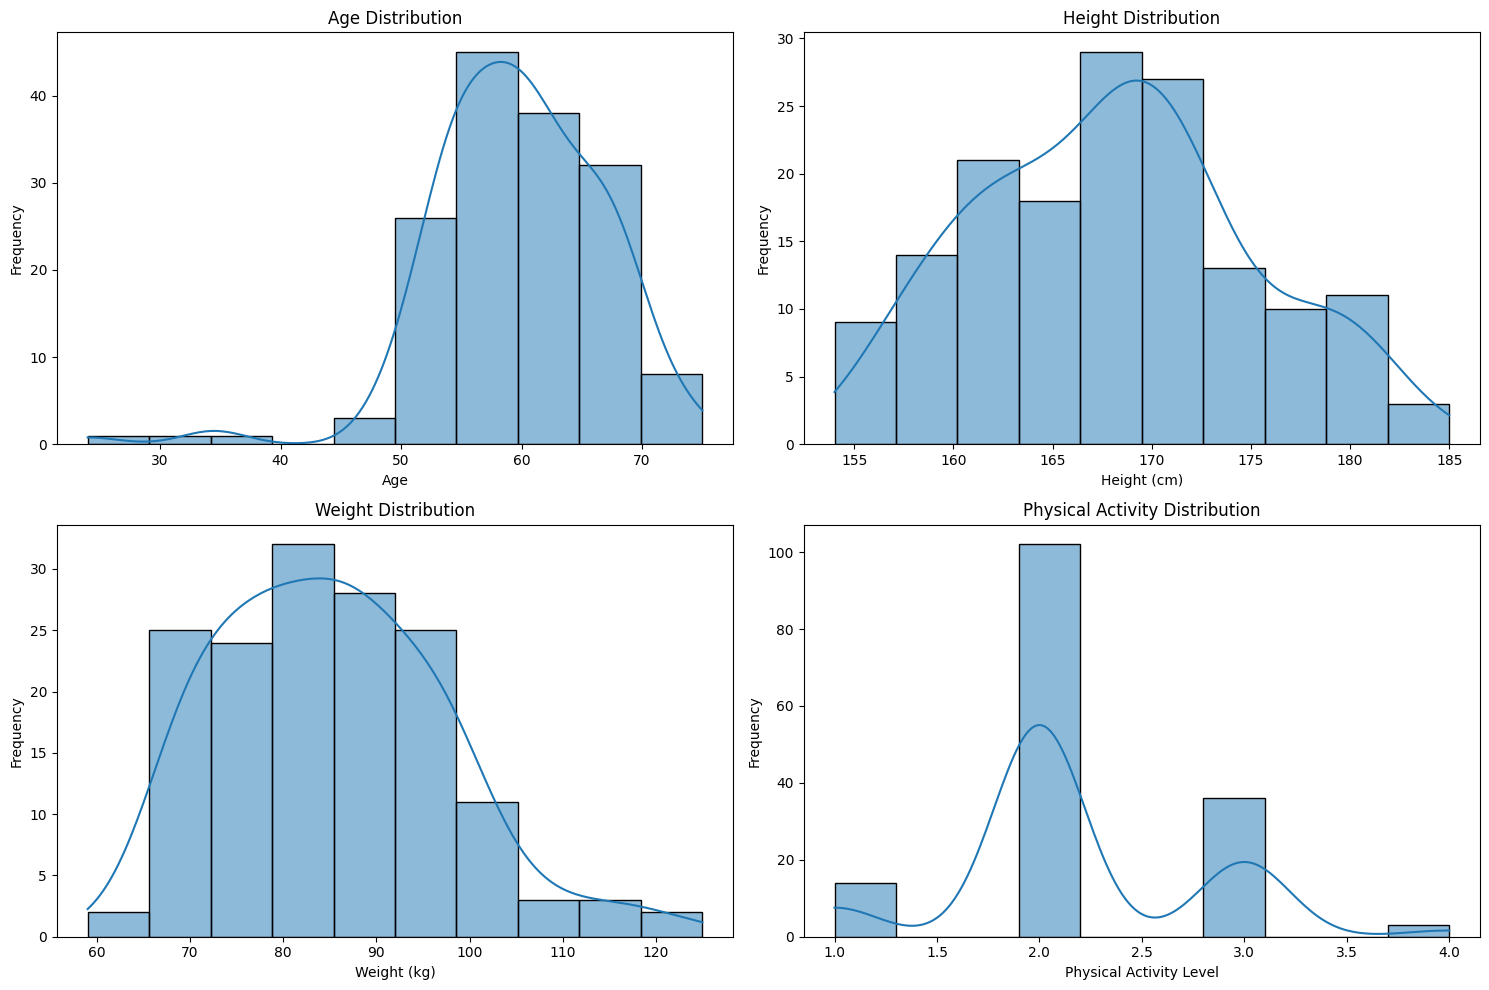

In [7]:


plt.figure(figsize=(15, 10))

# Age distribution
plt.subplot(2, 2, 1)
sns.histplot(df_patient_params['Age'], bins=10, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Height distribution
plt.subplot(2, 2, 2)
sns.histplot(df_patient_params['Height'], bins=10, kde=True)
plt.title('Height Distribution')
plt.xlabel('Height (cm)')
plt.ylabel('Frequency')

# Weight distribution
plt.subplot(2, 2, 3)
sns.histplot(df_patient_params['Weight'], bins=10, kde=True)
plt.title('Weight Distribution')
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')

# Physical Activity distribution
plt.subplot(2, 2, 4)
sns.histplot(df_patient_params['Physical Activity'], bins=10, kde=True)
plt.title('Physical Activity Distribution')
plt.xlabel('Physical Activity Level')
plt.ylabel('Frequency')

# Displaying the plots
plt.tight_layout()
plt.show()





In [8]:
correlation_matrix = df_patient_params[['Age', 'Height', 'Weight', 'Physical Activity']].corr()

# Displaying the correlation matrix
correlation_matrix

,Age,Height,Weight,Physical Activity
Age,1.000000,-0.129785,-0.040107,-0.199291
Height,-0.129785,1.000000,0.581012,-0.019083
Weight,-0.040107,0.581012,1.000000,-0.255098
Physical Activity,-0.199291,-0.019083,-0.255098,1.000000


### Distribution de l'Âge par Rapport aux Niveaux d'Activité Physique

Le graphique montre comment l'âge varie selon les niveaux d'activité physique. Cela peut indiquer que les jeunes ont tendance à être plus actifs, ce qui est cohérent avec les attentes générales

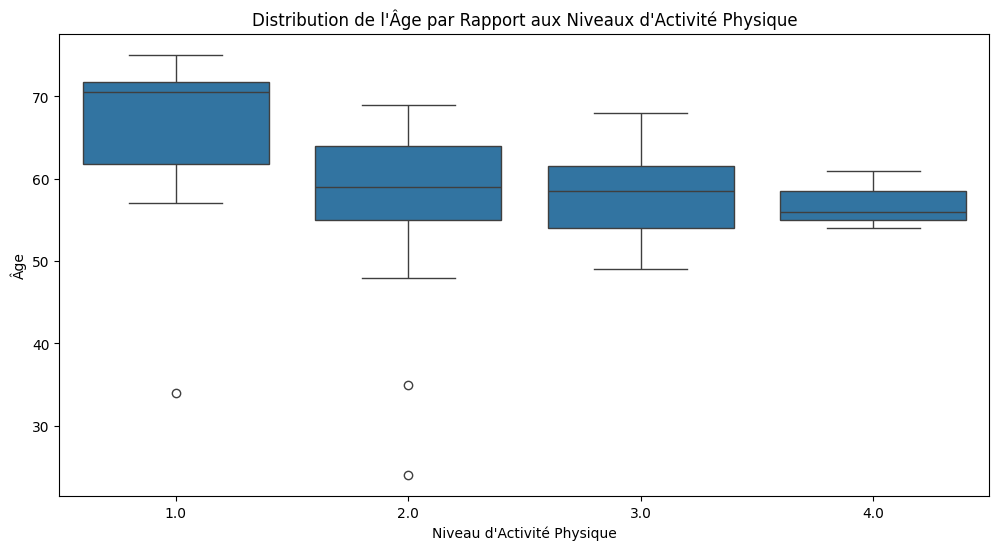

In [9]:
plt.figure(figsize=(12, 6))  
sns.boxplot(x='Physical Activity', y='Age', data=df_patient_params)  
plt.title('Distribution de l\'Âge par Rapport aux Niveaux d\'Activité Physique')  
plt.xlabel('Niveau d\'Activité Physique')  
plt.ylabel('Âge')  
plt.show()  

Les individus plus jeunes ont tendance à avoir des niveaux d’activité plus élevés.

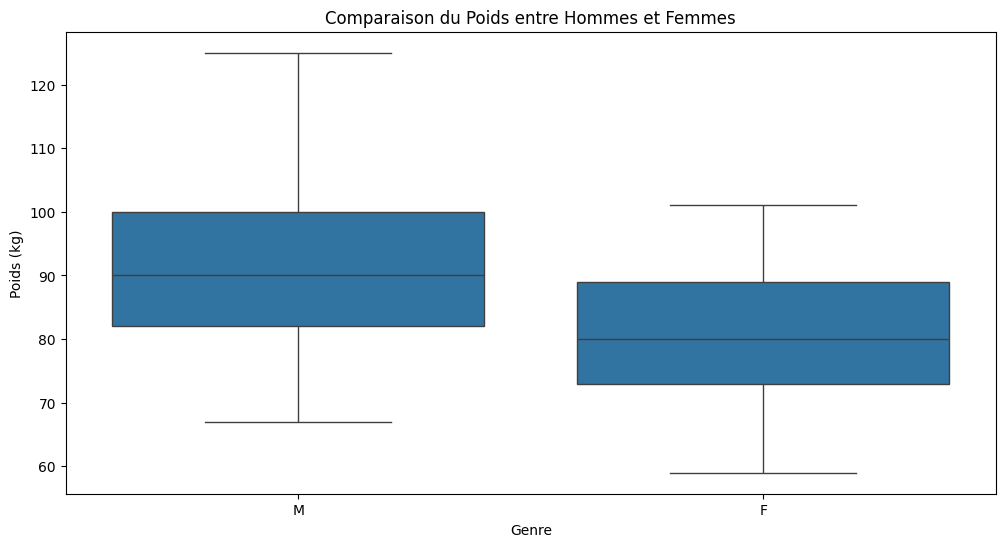

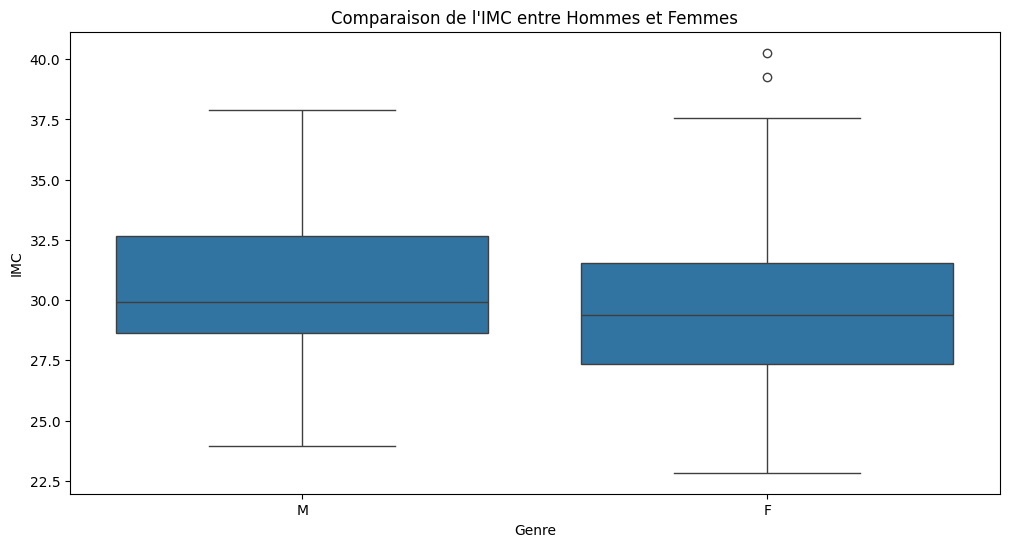

In [10]:
  
plt.figure(figsize=(12, 6))  
sns.boxplot(x='Gender', y='Weight', data=df_patient_params)  
plt.title('Comparaison du Poids entre Hommes et Femmes')  
plt.xlabel('Genre')  
plt.ylabel('Poids (kg)')  
plt.show()  
  
plt.figure(figsize=(12, 6))  
sns.boxplot(x='Gender', y='BMI', data=df_patient_params)  
plt.title('Comparaison de l\'IMC entre Hommes et Femmes')  
plt.xlabel('Genre')  
plt.ylabel('IMC')  
plt.show()  


Différences selon le sexe : Les hommes se retrouvent plus fréquemment dans des niveaux d’activité élevés

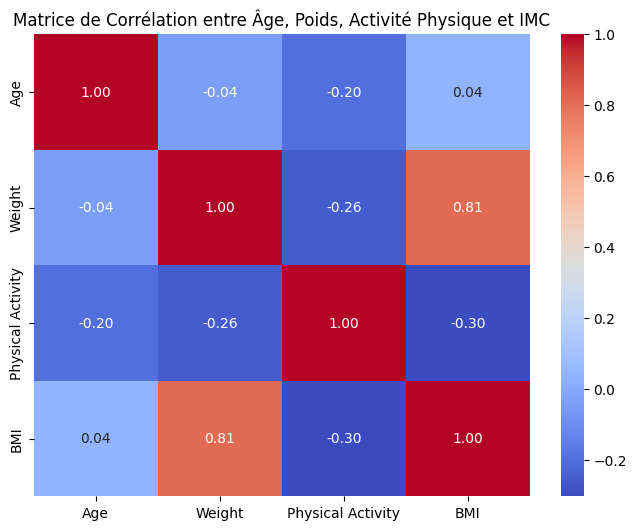

In [11]:
# Calcul de la matrice de corrélation  
correlation_matrix = df_patient_params[['Age', 'Weight', 'Physical Activity', 'BMI']].corr()  
  
# Visualisation de la matrice de corrélation  
plt.figure(figsize=(8, 6))  
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')  
plt.title('Matrice de Corrélation entre Âge, Poids, Activité Physique et IMC')  
plt.show()  

 Les hommes ont généralement une taille et un poids plus élevés que les femmes.

Des niveaux d’activité plus élevés sont associés à un IMC plus faible.

In [12]:
# Filtrer les cas avec un IMC élevé et un faible niveau d'activité  
high_bmi_low_activity = df_patient_params[(df_patient_params['BMI'] > 30) & (df_patient_params['Physical Activity'] < 2)]  
  
# Afficher les cas particuliers  
print(high_bmi_low_activity.head())  

          No  Age Gender  Height  Weight  Physical Activity  Height_m  \
0   case,320   64      M     172      97                1.0      1.72   
1   case,321   61      M     174     102                1.0      1.74   
2   case,322   57      F     158      82                1.0      1.58   
3   case,323   34      M     168      92                1.0      1.68   
17  case,337   72      M     185     115                1.0      1.85   

          BMI Age_Category  
0   32.787994          Âgé  
1   33.690052          Âgé  
2   32.847300          Âgé  
3   32.596372    Age moyen  
17  33.601169       Senior  


In [13]:
df_patient_params

,No,Age,Gender,Height,Weight,Physical Activity,Height_m,BMI,Age_Category
0,"case,320",64,M,172,97,1.0,1.72,32.787994,Âgé
1,"case,321",61,M,174,102,1.0,1.74,33.690052,Âgé
2,"case,322",57,F,158,82,1.0,1.58,32.847300,Âgé
3,"case,323",34,M,168,92,1.0,1.68,32.596372,Age moyen
4,"case,324",35,M,176,88,2.0,1.76,28.409091,Age moyen
...,...,...,...,...,...,...,...,...,...
150,"case,470",58,F,164,65,3.0,1.64,24.167162,Âgé
151,"case,471",59,M,172,100,2.0,1.72,33.802055,Âgé
152,"case,472",54,M,168,82,3.0,1.68,29.053288,Âgé
153,"case,473",59,F,170,66,2.0,1.70,22.837370,Âgé


## Anonymized_Test_Results_Atherosclerosis

In [ ]:
file_path = r'..\Anonymized_Test_Results_Atherosclerosis.csv'
df_test_results = pd.read_csv(file_path, encoding='ascii')
df_test_results.head()

,No,Cholesterol LDL
0,NaN,NaN
1,"case,320",139.0
2,"case,321",141.0
3,"case,322",158.0
4,"case,323",142.0


In [15]:
# Vérifier les valeurs manquantes et les doublons
missing_values = df_test_results.isnull().sum()
duplicates = df_test_results.duplicated().sum()

print('Missing Values:', missing_values)
print('Number of Duplicates:', duplicates)

Missing Values: No                 1
Cholesterol LDL    1
dtype: int64
Number of Duplicates: 0


In [16]:
# Supprimer les lignes contenant des valeurs manquantes
df_test_results_cleaned = df_test_results.dropna()

In [17]:
# Vérifier la forme (dimensions) du dataframe nettoyé
cleaned_shape = df_test_results_cleaned.shape
cleaned_shape

(155, 2)

In [18]:
# Afficher les premières lignes du dataframe nettoyé et sa forme
print(df_test_results_cleaned.head())
print('Shape of cleaned dataframe:', cleaned_shape)

         No  Cholesterol LDL
1  case,320            139.0
2  case,321            141.0
3  case,322            158.0
4  case,323            142.0
5  case,324            147.0
Shape of cleaned dataframe: (155, 2)


### Data Merging

In [19]:
# Merge the test results with patient parameters on the 'No' column
merged_data = pd.merge(df_test_results_cleaned, df_patient_params, on='No', how='inner')

# Display the head of the merged dataframe to inspect its structure
merged_data.head()

,No,Cholesterol LDL,Age,Gender,Height,Weight,Physical Activity,Height_m,BMI,Age_Category
0,"case,320",139.0,64,M,172,97,1.0,1.72,32.787994,Âgé
1,"case,321",141.0,61,M,174,102,1.0,1.74,33.690052,Âgé
2,"case,322",158.0,57,F,158,82,1.0,1.58,32.847300,Âgé
3,"case,323",142.0,34,M,168,92,1.0,1.68,32.596372,Age moyen
4,"case,324",147.0,35,M,176,88,2.0,1.76,28.409091,Age moyen


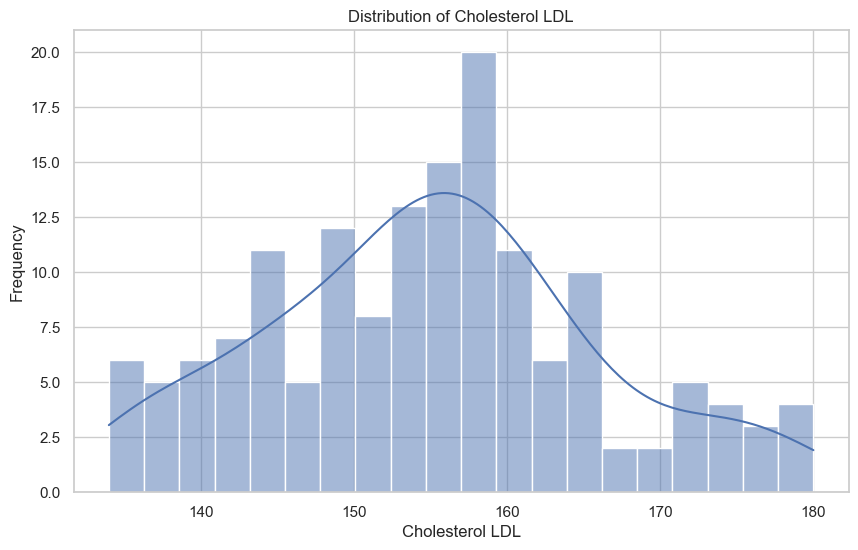

In [20]:
# Set the style for seaborn
sns.set(style='whitegrid')

# Plot the distribution of Cholesterol LDL
plt.figure(figsize=(10, 6))
sns.histplot(merged_data['Cholesterol LDL'], bins=20, kde=True)
plt.title('Distribution of Cholesterol LDL')
plt.xlabel('Cholesterol LDL')
plt.ylabel('Frequency')
plt.show()

La distribution semble être  asymétrique
majorité des patients ont des niveaux de cholestérol LDL plus faibles, tandis qu’un plus petit nombre présente des niveaux plus élevés.
La majorité des valeurs sont regroupées vers la partie basse

In [21]:
# Drop non-numeric columns from the merged dataset
numeric_data = merged_data.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix for numeric data
correlation_matrix = numeric_data.corr()

# Display the correlation matrix
correlation_matrix

,Cholesterol LDL,Age,Height,Weight,Physical Activity,Height_m,BMI
Cholesterol LDL,1.000000,0.070524,-0.040461,-0.223900,0.160284,-0.040461,-0.246968
Age,0.070524,1.000000,-0.129785,-0.040107,-0.199291,-0.129785,0.041670
Height,-0.040461,-0.129785,1.000000,0.581012,-0.019083,1.000000,0.000165
Weight,-0.223900,-0.040107,0.581012,1.000000,-0.255098,0.581012,0.810838
Physical Activity,0.160284,-0.199291,-0.019083,-0.255098,1.000000,-0.019083,-0.301765
Height_m,-0.040461,-0.129785,1.000000,0.581012,-0.019083,1.000000,0.000165
BMI,-0.246968,0.041670,0.000165,0.810838,-0.301765,0.000165,1.000000


Cholestérol LDL et activité physique : Le coefficient de corrélation est d’environ 0,16. Cela indique une faible corrélation positive, suggérant que des niveaux plus élevés d’activité physique pourraient être  associés à des niveaux plus élevés de cholestérol. mais la relation n’est pas suffisamment forte pour tirer des conclusions définitives.



## Nutritional_Values_Applied_Diet_Atherosclerosis

In [ ]:
# Charger le fichier CSV
file_path = r'..\Nutritional_Values_Applied_Diet_Atherosclerosis.csv'
diet_data = pd.read_csv(file_path, encoding='utf-8')

# Afficher les premières lignes du dataframe
diet_data.head()

,No,Type of Diet,Number of Meals per Day,Calories Summary,Protein (%),Fat (%),Carbohydrates (%),Iron (mg),Sodium (mg),Calcium (mg),...,Vitamin B3 (mg),Vitamin B5 (mg),Vitamin B6 (mg),Vitamin B7 (µg),Vitamin B12 (µg),Vitamin C (mg),Vitamin K (µg),Omega 6 (g),Cholesterol (mg/day),Dietary Fiber (g)
0,NaN,NaN,NaN,NaN,%,%,%,mg,mg,mg,...,mg,mg,mg,µg,µg,mg,µg,g,mg/day,g
1,"case,320",Eat Everything,4.0,NaN,19,22,59,"1,954,600,179","2,092,405,952","1,017,527,083",...,"2,189,446,071","0,7424002976","292,657,994",0,"3,238,821,429","3,285,986,369",0,"5,792,023,214","3,703,754,762","377,636,369"
2,"case,321",Ketogenic,4.0,NaN,16,72,12,"148,494,725","2,393,359,857","7,047,585,357",...,"1,771,571,982","0,8249348214","1,892,477,464","3,701,785,714","1,100,228,571","1,914,725,536","0,0004285714286","8,423,335,714","9,501,828,571","1,388,455,357"
3,"case,322",Eat Everything,5.0,NaN,18,29,53,"17,961,425","1,158,236,548","1,105,186,607",...,"150,087,756","0,4546530357","2,440,289,226",0,"2,315,952,381","304,549,869",0,"7,507,162,202","165,409,881","3,610,462,798"
4,"case,323",Vegetarian,4.0,NaN,15,31,54,"2,560,495,833","1,716,464,881","1,317,891,429",...,"1,802,797,512","1,186,439,286","3,120,480,595",0,"2,350,085,714","4,315,130,476",0,"1,246,665,714","1,941,871,429","4,392,614,286"


In [23]:
# Vérifier les valeurs manquantes et les types de données dans le dataframe
diet_data_info = diet_data.info()
missing_values = diet_data.isnull().sum()

# Afficher les informations sur le dataframe et les valeurs manquantes
diet_data_info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   No                       155 non-null    object 
 1   Type of Diet             155 non-null    object 
 2   Number of Meals per Day  155 non-null    float64
 3   Calories Summary         0 non-null      float64
 4   Protein (%)              156 non-null    object 
 5   Fat (%)                  156 non-null    object 
 6   Carbohydrates (%)        156 non-null    object 
 7   Iron (mg)                156 non-null    object 
 8   Sodium (mg)              156 non-null    object 
 9   Calcium (mg)             156 non-null    object 
 10  Phosphorus (mg)          156 non-null    object 
 11  Potassium (mg)           156 non-null    object 
 12  Magnesium (mg)           156 non-null    object 
 13  Zinc (mg)                156 non-null    object 
 14  Iodine (µg)              1

In [24]:
missing_values

No                           1
Type of Diet                 1
Number of Meals per Day      1
Calories Summary           156
Protein (%)                  0
Fat (%)                      0
Carbohydrates (%)            0
Iron (mg)                    0
Sodium (mg)                  0
Calcium (mg)                 0
Phosphorus (mg)              0
Potassium (mg)               0
Magnesium (mg)               0
Zinc (mg)                    0
Iodine (µg)                  0
Selenium (µg)                0
Copper (mg)                  0
Manganese (mg)               0
omega 3                      0
Vitamin A (µg)               0
Vitamin D (µg)               0
Vitamin E (mg)               0
wit. B1 - Tiamina            0
wit. B2 - Riboflavin         0
Vitamin B3 (mg)              0
Vitamin B5 (mg)              0
Vitamin B6 (mg)              0
Vitamin B7 (µg)              0
Vitamin B12 (µg)             0
Vitamin C (mg)               0
Vitamin K (µg)               0
Omega 6 (g)                  0
Choleste

colonne "Calories Summary" contiennent 156 valeurs manquantes

In [25]:
# Dropping the 'Calories Summary' column from the dataframe
df_cleaned = diet_data.drop(columns=['Calories Summary'])
df_cleaned = df_cleaned.dropna(subset=['No'])

# Displaying the head of the cleaned dataframe to confirm the column has been removed
df_cleaned.head()

,No,Type of Diet,Number of Meals per Day,Protein (%),Fat (%),Carbohydrates (%),Iron (mg),Sodium (mg),Calcium (mg),Phosphorus (mg),...,Vitamin B3 (mg),Vitamin B5 (mg),Vitamin B6 (mg),Vitamin B7 (µg),Vitamin B12 (µg),Vitamin C (mg),Vitamin K (µg),Omega 6 (g),Cholesterol (mg/day),Dietary Fiber (g)
1,"case,320",Eat Everything,4.0,19,22,59,"1,954,600,179","2,092,405,952","1,017,527,083","1,722,203,452",...,"2,189,446,071","0,7424002976","292,657,994",0,"3,238,821,429","3,285,986,369",0,"5,792,023,214","3,703,754,762","377,636,369"
2,"case,321",Ketogenic,4.0,16,72,12,"148,494,725","2,393,359,857","7,047,585,357","133,913,925",...,"1,771,571,982","0,8249348214","1,892,477,464","3,701,785,714","1,100,228,571","1,914,725,536","0,0004285714286","8,423,335,714","9,501,828,571","1,388,455,357"
3,"case,322",Eat Everything,5.0,18,29,53,"17,961,425","1,158,236,548","1,105,186,607","1,678,602,976",...,"150,087,756","0,4546530357","2,440,289,226",0,"2,315,952,381","304,549,869",0,"7,507,162,202","165,409,881","3,610,462,798"
4,"case,323",Vegetarian,4.0,15,31,54,"2,560,495,833","1,716,464,881","1,317,891,429","1,703,490,833",...,"1,802,797,512","1,186,439,286","3,120,480,595",0,"2,350,085,714","4,315,130,476",0,"1,246,665,714","1,941,871,429","4,392,614,286"
5,"case,324",Vegan,5.0,14,40,46,"3,329,617,411","2,574,069,375","1,620,502,143","1,586,660,446",...,"2,363,169,777","1,613,714,643","3,541,991,875",0,"0,9336428571","5,166,634,643",0,"1,307,219,018","6,021,428,571","6,208,724,107"


In [26]:
# Filling missing values in 'Type of Diet' with the mode
mode_type_of_diet = df_cleaned['Type of Diet'].mode()[0]
df_cleaned['Type of Diet'].fillna(mode_type_of_diet, inplace=True)

# Filling missing values in 'Number of Meals per Day' with the median
median_meals_per_day = df_cleaned['Number of Meals per Day'].median()
df_cleaned['Number of Meals per Day'].fillna(median_meals_per_day, inplace=True)

df_cleaned.isnull().sum()

No                         0
Type of Diet               0
Number of Meals per Day    0
Protein (%)                0
Fat (%)                    0
Carbohydrates (%)          0
Iron (mg)                  0
Sodium (mg)                0
Calcium (mg)               0
Phosphorus (mg)            0
Potassium (mg)             0
Magnesium (mg)             0
Zinc (mg)                  0
Iodine (µg)                0
Selenium (µg)              0
Copper (mg)                0
Manganese (mg)             0
omega 3                    0
Vitamin A (µg)             0
Vitamin D (µg)             0
Vitamin E (mg)             0
wit. B1 - Tiamina          0
wit. B2 - Riboflavin       0
Vitamin B3 (mg)            0
Vitamin B5 (mg)            0
Vitamin B6 (mg)            0
Vitamin B7 (µg)            0
Vitamin B12 (µg)           0
Vitamin C (mg)             0
Vitamin K (µg)             0
Omega 6 (g)                0
Cholesterol (mg/day)       0
Dietary Fiber (g)          0
dtype: int64

### Merged data

In [27]:
merged_final = pd.merge(df_cleaned, merged_data, on='No', how='inner')

# Display the head of the merged dataframe to inspect its structure
merged_final

,No,Type of Diet,Number of Meals per Day,Protein (%),Fat (%),Carbohydrates (%),Iron (mg),Sodium (mg),Calcium (mg),Phosphorus (mg),...,Dietary Fiber (g),Cholesterol LDL,Age,Gender,Height,Weight,Physical Activity,Height_m,BMI,Age_Category
0,"case,320",Eat Everything,4.0,19,22,59,"1,954,600,179","2,092,405,952","1,017,527,083","1,722,203,452",...,"377,636,369",139.0,64,M,172,97,1.0,1.72,32.787994,Âgé
1,"case,321",Ketogenic,4.0,16,72,12,"148,494,725","2,393,359,857","7,047,585,357","133,913,925",...,"1,388,455,357",141.0,61,M,174,102,1.0,1.74,33.690052,Âgé
2,"case,322",Eat Everything,5.0,18,29,53,"17,961,425","1,158,236,548","1,105,186,607","1,678,602,976",...,"3,610,462,798",158.0,57,F,158,82,1.0,1.58,32.847300,Âgé
3,"case,323",Vegetarian,4.0,15,31,54,"2,560,495,833","1,716,464,881","1,317,891,429","1,703,490,833",...,"4,392,614,286",142.0,34,M,168,92,1.0,1.68,32.596372,Age moyen
4,"case,324",Vegan,5.0,14,40,46,"3,329,617,411","2,574,069,375","1,620,502,143","1,586,660,446",...,"6,208,724,107",147.0,35,M,176,88,2.0,1.76,28.409091,Age moyen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,"case,470",Gluten-Free,3.0,19,74,7,"1,348,112,149","2,246,277,536","9,280,230,417","1,452,757,357",...,"1,107,394,821",180.0,58,F,164,65,3.0,1.64,24.167162,Âgé
151,"case,471",Eat Everything,6.0,21,24,55,"2,398,427,292","2,262,400,982","1,628,765,595","2,301,681,399",...,"4,683,033,036",177.0,59,M,172,100,2.0,1.72,33.802055,Âgé
152,"case,472",Eat Everything,4.0,22,28,50,"1,985,884,286","28,811,525","1,248,156,071","23,431,925",...,"4,156,635,714",171.0,54,M,168,82,3.0,1.68,29.053288,Âgé
153,"case,473",Mediterranean,5.0,17,29,54,"2,103,043,929","1,973,179,643","1,158,561,786","15,862,275",...,"3,421,667,857",158.0,59,F,170,66,2.0,1.70,22.837370,Âgé


In [28]:
print("\n Valeurs manquantes par colonne :")
print(merged_final.isnull().sum())


 Valeurs manquantes par colonne :
No                         0
Type of Diet               0
Number of Meals per Day    0
Protein (%)                0
Fat (%)                    0
Carbohydrates (%)          0
Iron (mg)                  0
Sodium (mg)                0
Calcium (mg)               0
Phosphorus (mg)            0
Potassium (mg)             0
Magnesium (mg)             0
Zinc (mg)                  0
Iodine (µg)                0
Selenium (µg)              0
Copper (mg)                0
Manganese (mg)             0
omega 3                    0
Vitamin A (µg)             0
Vitamin D (µg)             0
Vitamin E (mg)             0
wit. B1 - Tiamina          0
wit. B2 - Riboflavin       0
Vitamin B3 (mg)            0
Vitamin B5 (mg)            0
Vitamin B6 (mg)            0
Vitamin B7 (µg)            0
Vitamin B12 (µg)           0
Vitamin C (mg)             0
Vitamin K (µg)             0
Omega 6 (g)                0
Cholesterol (mg/day)       0
Dietary Fiber (g)          0
Choleste

In [29]:
merged_final["BMI_Category"] = pd.cut(
    merged_final["BMI"],
    bins=[0, 18.5, 25, 30, 35, np.inf],
    labels=["Underweight", "Normal", "Surpoids", "Obésité", "Obésité sévère"]
)

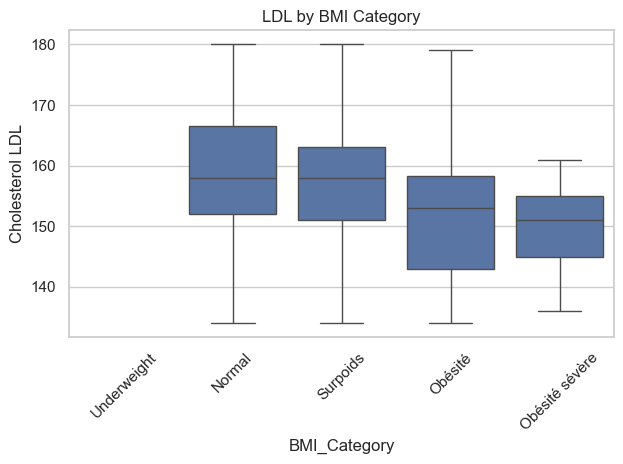

In [30]:
sns.boxplot(data=merged_final, x="BMI_Category", y="Cholesterol LDL")
plt.title("LDL by BMI Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Visualisation croisée BMI_Category × Diet_Type × Cholesterol LDL


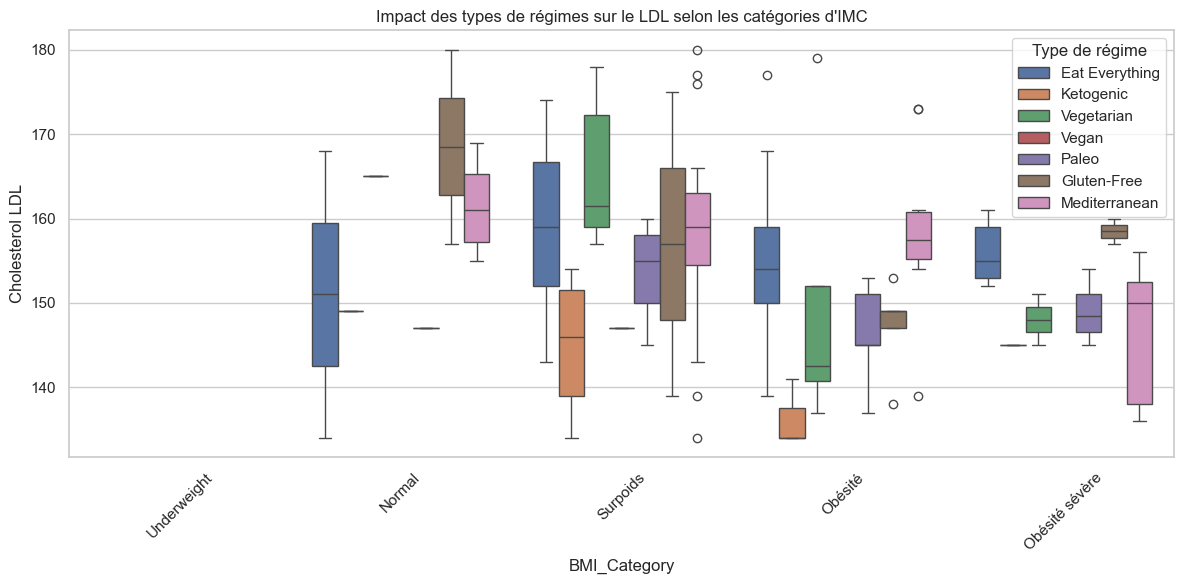

In [31]:
plt.figure(figsize=(12, 6))

# Création d'un boxplot avec 2 dimensions catégorielles
sns.boxplot(
    data=merged_final,
    x="BMI_Category",
    y="Cholesterol LDL",
    hue="Type of Diet"  
)

plt.title("Impact des types de régimes sur le LDL selon les catégories d'IMC")
plt.xticks(rotation=45)
plt.legend(title="Type de régime")
plt.tight_layout()
plt.show()


Axe des X (Catégorie IMC) : Affiche les différentes catégories d’Indice de Masse Corporelle des patients.
Axe des Y (Cholestérol LDL) : Affiche les niveaux de cholestérol LDL.
Chaque couleur représente un type de régime différent. 
Elle aide à identifier quels régimes peuvent être plus efficaces pour différentes catégories d’IMC dans la gestion du cholestérol. (niveaux de LDL plus bas)

In [32]:
merged_final.columns

Index(['No', 'Type of Diet', 'Number of Meals per Day', 'Protein (%)',
       'Fat (%)', 'Carbohydrates (%)', 'Iron (mg)', 'Sodium (mg)',
       'Calcium (mg)', 'Phosphorus (mg)', 'Potassium (mg)', 'Magnesium (mg)',
       'Zinc (mg)', 'Iodine (µg)', 'Selenium (µg)', 'Copper (mg)',
       'Manganese (mg)', 'omega 3', 'Vitamin A (µg)', 'Vitamin D (µg)',
       'Vitamin E (mg)', 'wit. B1 - Tiamina', 'wit. B2 - Riboflavin',
       'Vitamin B3 (mg)', 'Vitamin B5 (mg)', 'Vitamin B6 (mg)',
       'Vitamin B7 (µg)', 'Vitamin B12 (µg)', 'Vitamin C (mg)',
       'Vitamin K (µg)', 'Omega 6 (g)', 'Cholesterol (mg/day)',
       'Dietary Fiber (g)', 'Cholesterol LDL', 'Age', 'Gender', 'Height',
       'Weight', 'Physical Activity', 'Height_m', 'BMI', 'Age_Category',
       'BMI_Category'],
      dtype='object')

## Scoring_Results_After_Applying_Diet_Atherosclerosis

In [ ]:
path=r"..\Scoring_Results_After_Applying_Diet_Atherosclerosis.csv"

In [34]:
df_score = pd.read_csv(path, encoding='ascii')
df_score.head()

,No,Cholesterol LDL,Scoring
0,"case,320","13,67%",2
1,"case,321","-13,48%",-2
2,"case,322","17,72%",2
3,"case,323","4,93%",1
4,"case,324","3,40%",1


### Preprocessing 

In [35]:
print("\n Valeurs manquantes par colonne :")
print(df_score.isnull().sum())


 Valeurs manquantes par colonne :
No                 0
Cholesterol LDL    0
Scoring            0
dtype: int64


In [36]:
df_score.dtypes

No                 object
Cholesterol LDL    object
Scoring             int64
dtype: object

In [37]:
print(df_score.columns.tolist())

['No', 'Cholesterol LDL', 'Scoring']


In [38]:
print(df_score['Cholesterol LDL'].dtype)

object


In [39]:

df_score['Cholesterol LDL'] = (
    df_score['Cholesterol LDL']
    .str.replace('%', '')
    .str.replace(',', '.')
    .astype(float)
)
df_score

,No,Cholesterol LDL,Scoring
0,"case,320",13.67,2
1,"case,321",-13.48,-2
2,"case,322",17.72,2
3,"case,323",4.93,1
4,"case,324",3.40,1
...,...,...,...
150,"case,470",1.11,0
151,"case,471",5.65,1
152,"case,472",9.94,1
153,"case,473",16.46,2


### Mergin the whole data

In [40]:
df = pd.merge(df_score, merged_final, on='No', how='inner')
df

,No,Cholesterol LDL_x,Scoring,Type of Diet,Number of Meals per Day,Protein (%),Fat (%),Carbohydrates (%),Iron (mg),Sodium (mg),...,Cholesterol LDL_y,Age,Gender,Height,Weight,Physical Activity,Height_m,BMI,Age_Category,BMI_Category
0,"case,320",13.67,2,Eat Everything,4.0,19,22,59,"1,954,600,179","2,092,405,952",...,139.0,64,M,172,97,1.0,1.72,32.787994,Âgé,Obésité
1,"case,321",-13.48,-2,Ketogenic,4.0,16,72,12,"148,494,725","2,393,359,857",...,141.0,61,M,174,102,1.0,1.74,33.690052,Âgé,Obésité
2,"case,322",17.72,2,Eat Everything,5.0,18,29,53,"17,961,425","1,158,236,548",...,158.0,57,F,158,82,1.0,1.58,32.847300,Âgé,Obésité
3,"case,323",4.93,1,Vegetarian,4.0,15,31,54,"2,560,495,833","1,716,464,881",...,142.0,34,M,168,92,1.0,1.68,32.596372,Age moyen,Obésité
4,"case,324",3.40,1,Vegan,5.0,14,40,46,"3,329,617,411","2,574,069,375",...,147.0,35,M,176,88,2.0,1.76,28.409091,Age moyen,Surpoids
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,"case,470",1.11,0,Gluten-Free,3.0,19,74,7,"1,348,112,149","2,246,277,536",...,180.0,58,F,164,65,3.0,1.64,24.167162,Âgé,Normal
151,"case,471",5.65,1,Eat Everything,6.0,21,24,55,"2,398,427,292","2,262,400,982",...,177.0,59,M,172,100,2.0,1.72,33.802055,Âgé,Obésité
152,"case,472",9.94,1,Eat Everything,4.0,22,28,50,"1,985,884,286","28,811,525",...,171.0,54,M,168,82,3.0,1.68,29.053288,Âgé,Surpoids
153,"case,473",16.46,2,Mediterranean,5.0,17,29,54,"2,103,043,929","1,973,179,643",...,158.0,59,F,170,66,2.0,1.70,22.837370,Âgé,Normal


In [41]:
print("Dataset shape:", df.shape)


Dataset shape: (155, 45)


In [42]:
df.columns.tolist()


['No',
 'Cholesterol LDL_x',
 'Scoring',
 'Type of Diet',
 'Number of Meals per Day',
 'Protein (%)',
 'Fat (%)',
 'Carbohydrates (%)',
 'Iron (mg)',
 'Sodium (mg)',
 'Calcium (mg)',
 'Phosphorus (mg)',
 'Potassium (mg)',
 'Magnesium (mg)',
 'Zinc (mg)',
 'Iodine (µg)',
 'Selenium (µg)',
 'Copper (mg)',
 'Manganese (mg)',
 'omega 3',
 'Vitamin A (µg)',
 'Vitamin D (µg)',
 'Vitamin E (mg)',
 'wit. B1 - Tiamina',
 'wit. B2 - Riboflavin',
 'Vitamin B3 (mg)',
 'Vitamin B5 (mg)',
 'Vitamin B6 (mg)',
 'Vitamin B7 (µg)',
 'Vitamin B12 (µg)',
 'Vitamin C (mg)',
 'Vitamin K (µg)',
 'Omega 6 (g)',
 'Cholesterol (mg/day)',
 'Dietary Fiber (g)',
 'Cholesterol LDL_y',
 'Age',
 'Gender',
 'Height',
 'Weight',
 'Physical Activity',
 'Height_m',
 'BMI',
 'Age_Category',
 'BMI_Category']

In [43]:
df.head()

,No,Cholesterol LDL_x,Scoring,Type of Diet,Number of Meals per Day,Protein (%),Fat (%),Carbohydrates (%),Iron (mg),Sodium (mg),...,Cholesterol LDL_y,Age,Gender,Height,Weight,Physical Activity,Height_m,BMI,Age_Category,BMI_Category
0,"case,320",13.67,2,Eat Everything,4.0,19,22,59,"1,954,600,179","2,092,405,952",...,139.0,64,M,172,97,1.0,1.72,32.787994,Âgé,Obésité
1,"case,321",-13.48,-2,Ketogenic,4.0,16,72,12,"148,494,725","2,393,359,857",...,141.0,61,M,174,102,1.0,1.74,33.690052,Âgé,Obésité
2,"case,322",17.72,2,Eat Everything,5.0,18,29,53,"17,961,425","1,158,236,548",...,158.0,57,F,158,82,1.0,1.58,32.847300,Âgé,Obésité
3,"case,323",4.93,1,Vegetarian,4.0,15,31,54,"2,560,495,833","1,716,464,881",...,142.0,34,M,168,92,1.0,1.68,32.596372,Age moyen,Obésité
4,"case,324",3.40,1,Vegan,5.0,14,40,46,"3,329,617,411","2,574,069,375",...,147.0,35,M,176,88,2.0,1.76,28.409091,Age moyen,Surpoids


### Preprocessing



In [44]:
# 1. Encoding categorical variables (Diet Type and Gender)
df['Type of Diet'] = df['Type of Diet'].astype('category').cat.codes
df['Gender'] = df['Gender'].astype('category').cat.codes


In [45]:
# 2. Creating age categories
bins_age = [0, 18, 35, 50, 65, 100]
labels_age = ['0-18', '19-35', '36-50', '51-65', '66+']
df['Age_Category'] = pd.cut(df['Age'], bins=bins_age, labels=labels_age, right=False)


### Outliers

In [46]:
# 2. Sélectionner les colonnes numériques uniquement
df_num = df.select_dtypes(include=['int64', 'float64'])


In [47]:
# 3. Détection des outliers avec IQR
def detect_outliers_iqr(df):
    outlier_indices = {}
    for col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        outliers = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)]
        if not outliers.empty:
            outlier_indices[col] = outliers.index.tolist()
    return outlier_indices

outliers = detect_outliers_iqr(df_num)
outliers

{'Cholesterol LDL_x': [137],
 'Age': [3, 4, 5],
 'Weight': [24, 34],
 'Physical Activity': [0,
  1,
  2,
  3,
  17,
  21,
  26,
  27,
  29,
  38,
  46,
  66,
  119,
  124,
  132,
  147,
  154],
 'BMI': [25, 32]}

In [48]:
print("📊 Colonnes avec outliers détectés :")
for col, indices in outliers.items():
    print(f" - {col} : {len(indices)} outliers")



📊 Colonnes avec outliers détectés :
 - Cholesterol LDL_x : 1 outliers
 - Age : 3 outliers
 - Weight : 2 outliers
 - Physical Activity : 17 outliers
 - BMI : 2 outliers


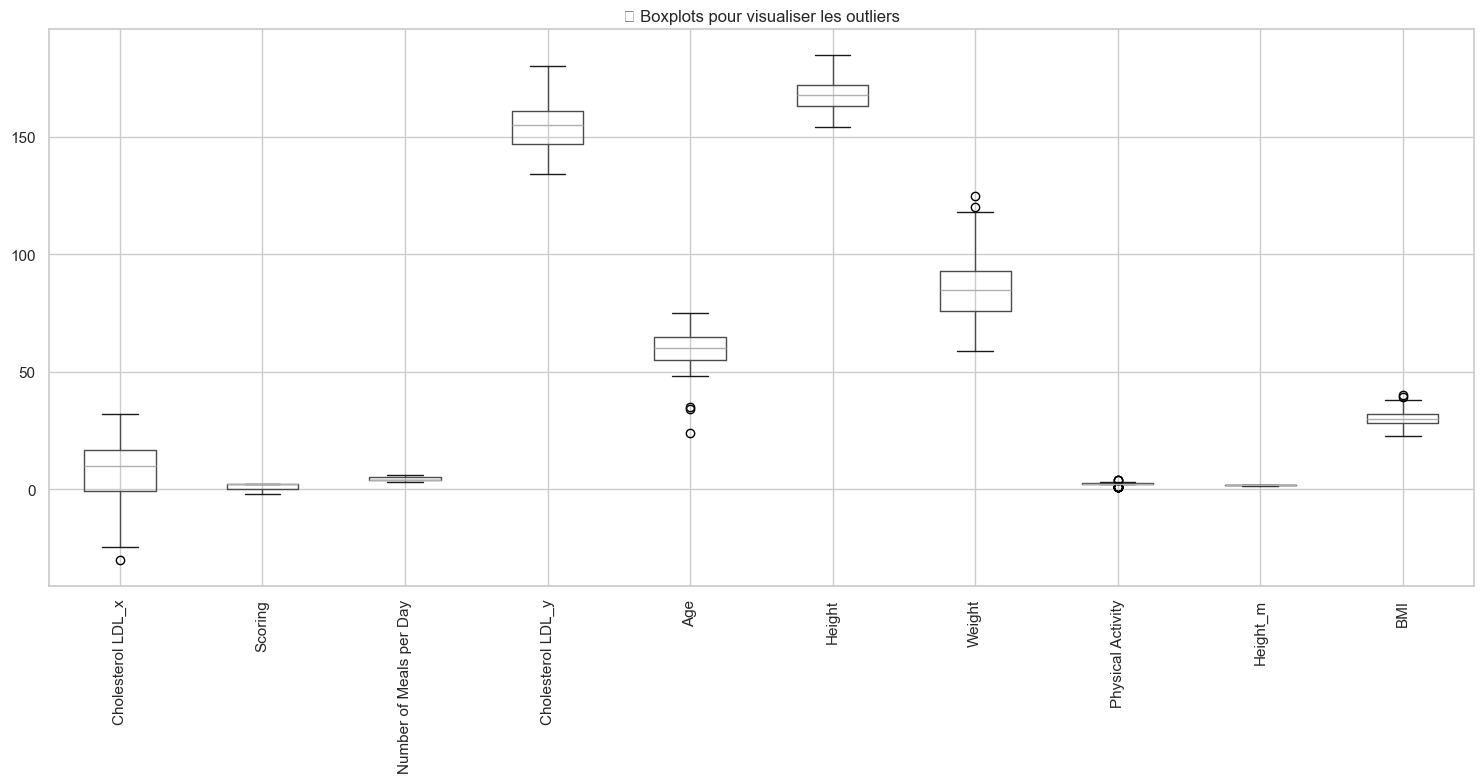

In [49]:
# 5. Visualisation des outliers
plt.figure(figsize=(15, 8))
df_num.boxplot(rot=90)
plt.title("📦 Boxplots pour visualiser les outliers")
plt.tight_layout()
plt.show()


In [50]:
def replace_outliers_with_median(df):
    df = df.copy()  # Évite de modifier le df original
    for col in ['Cholesterol LDL_x', 'Age', 'Weight', 'Physical Activity', 'BMI']:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        median = df[col].median()
        mask_outliers = (df[col] < lower_bound) | (df[col] > upper_bound)
        count_outliers = mask_outliers.sum()
        df.loc[mask_outliers, col] = median
        print(f"🔁 {count_outliers} outliers remplacés dans la colonne : {col}")
    return df

df_cleaned = replace_outliers_with_median(df)


🔁 1 outliers remplacés dans la colonne : Cholesterol LDL_x
🔁 3 outliers remplacés dans la colonne : Age
🔁 2 outliers remplacés dans la colonne : Weight
🔁 17 outliers remplacés dans la colonne : Physical Activity
🔁 2 outliers remplacés dans la colonne : BMI


In [51]:
print("📊 Distribution de la variable 'Scoring' avant regroupement :\n", df_cleaned['Scoring'].value_counts())


📊 Distribution de la variable 'Scoring' avant regroupement :
 Scoring
 2    78
 1    32
-1    19
 0    15
-2    11
Name: count, dtype: int64


In [52]:
# Regrouper les scores faibles vs forts
def binarize_scoring(score):
    return 1 if score > 0 else 0

df_cleaned['Scoring'] = df_cleaned['Scoring'].apply(binarize_scoring)
print("✅ Nouvelle distribution binaire :\n", df_cleaned['Scoring'].value_counts())


✅ Nouvelle distribution binaire :
 Scoring
1    110
0     45
Name: count, dtype: int64


In [53]:
# Convertir les colonnes pertinentes en float, en supprimant les caractères non numériques comme '%' si nécessaire
for col in ['Protein (%)', 'Fat (%)', 'Carbohydrates (%)']:
    df_cleaned[col] = df[col].str.replace('%', '', regex=False) 
    df_cleaned[col] = pd.to_numeric(df[col], errors='coerce')    
# Ajouter les ratios en évitant la division par zéro
df_cleaned['Protein_Fat_Ratio'] = df_cleaned['Protein (%)'] / df_cleaned['Fat (%)'].replace(0, pd.NA)
df_cleaned['Carbohydrate_Fat_Ratio'] = df_cleaned['Carbohydrates (%)'] / df_cleaned['Fat (%)'].replace(0, pd.NA)

In [54]:
# Afficher les premières lignes pour vérification
df_cleaned[['Protein (%)', 'Fat (%)', 'Carbohydrates (%)', 'Protein_Fat_Ratio', 'Carbohydrate_Fat_Ratio']].head()


,Protein (%),Fat (%),Carbohydrates (%),Protein_Fat_Ratio,Carbohydrate_Fat_Ratio
0,19,22,59,0.863636,2.681818
1,16,72,12,0.222222,0.166667
2,18,29,53,0.620690,1.827586
3,15,31,54,0.483871,1.741935
4,14,40,46,0.350000,1.150000


In [59]:
def nettoyer_colonne_numerique_robuste(col):
    """
    Nettoie une colonne contenant des nombres au format européen
    """
    def clean_value(val):
        if pd.isna(val) or val == '' or val is None:
            return 0.0
        
        val_str = str(val).strip()
        if val_str == '' or val_str.lower() == 'nan':
            return 0.0
        
        try:
            return float(val_str)
        except ValueError:
            pass

        val_str = val_str.replace(' ', '')

        if ',' in val_str and '.' not in val_str:
            if val_str.count(',') > 1:
                val_str = val_str.replace(',', '')
            else:
                val_str = val_str.replace(',', '.')

        elif '.' in val_str and ',' in val_str:
            parties = val_str.split(',')
            if len(parties) == 2:
                partie_entiere = parties[0].replace('.', '')
                partie_decimale = parties[1]
                val_str = partie_entiere + '.' + partie_decimale
            else:
                val_str = val_str.replace('.', '').replace(',', '.')

        elif '.' in val_str and ',' not in val_str:
            nb_points = val_str.count('.')
            if nb_points > 1:
                val_str = val_str.replace('.', '')

        try:
            return float(val_str)
        except ValueError:
            print(f"⚠️ Impossible de convertir : '{val}' -> '{val_str}'")
            return 0.0

    return col.apply(clean_value)


In [60]:
df_cleaned

,No,Cholesterol LDL_x,Scoring,Type of Diet,Number of Meals per Day,Protein (%),Fat (%),Carbohydrates (%),Iron (mg),Sodium (mg),...,Gender,Height,Weight,Physical Activity,Height_m,BMI,Age_Category,BMI_Category,Protein_Fat_Ratio,Carbohydrate_Fat_Ratio
0,"case,320",13.67,1,0,4.0,19,22,59,"1,954,600,179","2,092,405,952",...,1,172,97,2.0,1.72,32.787994,51-65,Obésité,0.863636,2.681818
1,"case,321",-13.48,0,2,4.0,16,72,12,"148,494,725","2,393,359,857",...,1,174,102,2.0,1.74,33.690052,51-65,Obésité,0.222222,0.166667
2,"case,322",17.72,1,0,5.0,18,29,53,"17,961,425","1,158,236,548",...,0,158,82,2.0,1.58,32.847300,51-65,Obésité,0.620690,1.827586
3,"case,323",4.93,1,6,4.0,15,31,54,"2,560,495,833","1,716,464,881",...,1,168,92,2.0,1.68,32.596372,19-35,Obésité,0.483871,1.741935
4,"case,324",3.40,1,5,5.0,14,40,46,"3,329,617,411","2,574,069,375",...,1,176,88,2.0,1.76,28.409091,36-50,Surpoids,0.350000,1.150000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,"case,470",1.11,0,1,3.0,19,74,7,"1,348,112,149","2,246,277,536",...,0,164,65,3.0,1.64,24.167162,51-65,Normal,0.256757,0.094595
151,"case,471",5.65,1,0,6.0,21,24,55,"2,398,427,292","2,262,400,982",...,1,172,100,2.0,1.72,33.802055,51-65,Obésité,0.875000,2.291667
152,"case,472",9.94,1,0,4.0,22,28,50,"1,985,884,286","28,811,525",...,1,168,82,3.0,1.68,29.053288,51-65,Surpoids,0.785714,1.785714
153,"case,473",16.46,1,3,5.0,17,29,54,"2,103,043,929","1,973,179,643",...,0,170,66,2.0,1.70,22.837370,51-65,Normal,0.586207,1.862069
